# Introduction and Background

### Research Question

The aim of our project is to find trends between different injuries and fatalities caused by car accidents. We want to learn if car accidents are more prone with certain age groups, models of cars, or a certain geographical area. 

### Overview

To answer our research question, we will only be focusing on injuries and fatalities that have occured in the United States. We were able to find several datasets providing detailed information of the occurences injuries/fatalities. ALthough there were datasets that had global information, we thought that it be easier to analyze our results if only looking at the United States. Partly because we are more familiar with how navigating a vehicle works in the United States. 

We decided to analyze car accidents within the time frame __ . We think that no matter what time fram we decide to analyze, our end results should ultimately reflect the averages of car accidents in any given year. 

### Hypothesis

We believe that there are trends between differet injuries/fatalies caused by car accidents. In particular, we believe that the types of cars involve in the car accident does influence the outcome. In addition, we believe that certain age groups are more prone to be in car accidents than others. We hope to answer these hyphothesis as well as uncover other trends in our data sets.

### Background

Automobiles are a great tool that we all used in our daily lives to get around, yet automobiles form a large portion of the fatalites and injuries in the United States. In our project, we want to examine fatalities and injuries caused by motor vehicles to see the similarites that exist. Most car accidents do go reported and the data collected is very detailed. For example, the make and model of the car, age of driver, severity of accident, etc for the most part are collected.



### Datasets

### Data Gathering, Wrangling, and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df_acc = pd.read_csv('ACCIDENT.csv')
df_per = pd.read_csv('PERSON.csv')

In [3]:
df_acc.head(5)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [4]:

df_acc.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [5]:
df_acc['CF2'].value_counts()

0     33128
99      322
23       64
19       40
27       23
14       22
15       22
20       11
28        7
26        4
22        2
5         2
4         2
3         2
18        1
6         1
2         1
Name: CF2, dtype: int64

In [6]:
df_acc=df_acc.drop(columns=['STATE', 'VE_FORMS', 'PVH_INVL','PERMVIT', 'PERNOTMVIT', 'COUNTY','CITY', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 
                            'NHS', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR',
                            'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2','TYP_INT', 'WEATHER1', 'WEATHER2', 'RAIL', 'NOT_HOUR','NOT_MIN', "ARR_HOUR",
                            'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3'])
df_acc
                    

,ST_CASE,VE_TOTAL,PEDS,PERSONS,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,FATALS,DRUNK_DR
0,10001,2,0,1,0,2,4,1,0,1,0
1,10002,1,0,2,0,3,2,2,0,2,0
2,10003,2,0,2,1,4,2,10,0,1,0
3,10004,1,0,2,0,4,1,10,0,1,0
4,10005,2,0,2,0,1,1,1,0,1,0
5,10006,2,1,4,0,2,2,1,0,1,0
6,10007,1,1,1,0,1,1,1,0,1,0
7,10008,2,1,1,0,1,2,10,0,1,0
8,10009,1,0,1,0,8,3,10,0,1,1
9,10010,1,1,1,1,1,2,1,0,1,0


In [7]:
df_per.head(5)

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,121,5,1,6,...,600,0,0,0,0,0,1,7,2,0
1,1,10002,1,1,1,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
2,1,10002,1,1,2,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
3,1,10003,2,1,1,0,21,8,1,22,...,2250,0,0,0,0,0,0,7,1,0
4,1,10003,2,2,1,0,21,8,1,22,...,8888,999,99,0,0,0,8,0,0,0


In [8]:

df_per.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY',
       'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV',
       'MAN_COLL', 'SCH_BUS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR',
       'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP',
       'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'REST_MIS',
       'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT', 'DRINKING', 'ALC_DET',
       'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'DSTATUS',
       'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO', 'DEATH_YR', 'DEATH_HR',
       'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS', 'P_SF1', 'P_SF2',
       'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'],
      dtype='object')

In [9]:
df_per['MAKE'].value_counts()

12.0    11002
20.0    10655
49.0     6745
37.0     5361
7.0      4953
        ...  
10.0        4
74.0        3
43.0        2
64.0        1
25.0        1
Name: MAKE, Length: 67, dtype: int64

In [10]:
df_per=df_per.drop(columns=['STATE','SCH_BUS', 'VE_FORMS', 'STR_VEH', 'COUNTY', 'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS',
                            'HARM_EV', 'MAN_COLL', 'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER',
                            'IMPACT1', 'FIRE_EXP',  'PER_TYP', 'SEAT_POS', 'REST_MIS', 'AIR_BAG', 'EJECTION',
                            'EJ_PATH', 'EXTRICAT', 'ALC_STATUS','ATST_TYP', 'ALC_RES', 'DSTATUS', 'HOSPITAL', 'DOA', 'DEATH_DA',
                            'DEATH_MO', 'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS','P_SF1', 'P_SF2',
                            'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'])
df_per.head()
                            

,ST_CASE,VEH_NO,PER_NO,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,DRINKING,ALC_DET,DRUGS,DRUG_DET
0,10001,1,1,82.0,82881.0,66.0,2018.0,55,1,4,20,0,9,0,8
1,10002,1,1,58.0,58037.0,4.0,9999.0,24,1,4,20,9,9,9,8
2,10002,1,2,58.0,58037.0,4.0,9999.0,24,1,4,3,8,9,8,8
3,10003,1,1,63.0,63402.0,14.0,2008.0,37,2,4,20,0,9,9,8
4,10003,2,1,7.0,7881.0,61.0,2001.0,36,1,2,20,0,9,0,8


In [11]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff'
           }

In [12]:
df_per.INJ_SEV.unique()

array([4, 2, 0, 3, 1, 9, 5, 6])

In [13]:
inj_str = ['No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 
        'Suspected Serious Injury', 'Fatal Injury', 'Injured, Severity Unknown', 
        'Died Prior to Crash', '','','Unknown']
#for i in range(0,10):
#    if injury = i:
#        injury = inj_str(i)

In [14]:
def change_inj(injury):
    for i in range(0,10):
        if injury == i:
            injury = inj_str[i]
    return injury

In [15]:
df_per.INJ_SEV = df_per.INJ_SEV.apply(change_inj)

Plotting Injury severity across all cases and people

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/inj_severity.png'

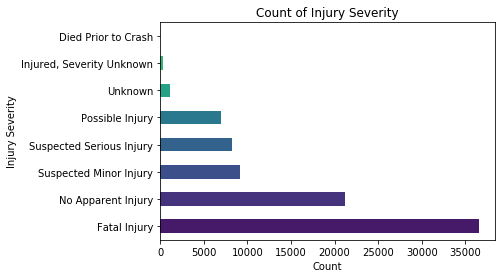

In [16]:
inj_counts = df_per.INJ_SEV.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(inj_counts))]
fig, ax = plt.subplots()
inj_counts.plot('barh', color = color1)
plt.xlabel('Count')
plt.ylabel('Injury Severity')
plt.title('Count of Injury Severity')
plt.savefig('Plots/inj_severity.png')
plt.show()

Merging person and accident datasets on ST_CASE as index

In [17]:
df = df_acc.merge(df_per)
df.head(5)

,ST_CASE,VE_TOTAL,PEDS,PERSONS,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,FATALS,...,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,DRINKING,ALC_DET,DRUGS,DRUG_DET
0,10001,2,0,1,0,2,4,1,0,1,...,66.0,2018.0,55,1,Fatal Injury,20,0,9,0,8
1,10002,1,0,2,0,3,2,2,0,2,...,4.0,9999.0,24,1,Fatal Injury,20,9,9,9,8
2,10002,1,0,2,0,3,2,2,0,2,...,4.0,9999.0,24,1,Fatal Injury,3,8,9,8,8
3,10003,2,0,2,1,4,2,10,0,1,...,14.0,2008.0,37,2,Fatal Injury,20,0,9,9,8
4,10003,2,0,2,1,4,2,10,0,1,...,61.0,2001.0,36,1,Suspected Minor Injury,20,0,9,0,8


In [18]:
df = df[df.AGE <= 99]

In [19]:
bins = np.append(np.arange(0,90,5), [90,99])
df['age_bins'] = pd.cut(x=df.AGE, bins=bins)

Removing unreported sex data

In [20]:
df.SEX.value_counts()

1    53870
2    27603
8       60
9       11
Name: SEX, dtype: int64

In [21]:
df = df[df.SEX <= 3]

Histogram of the ages involved in all 2018 accidents

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/age_groups.png'

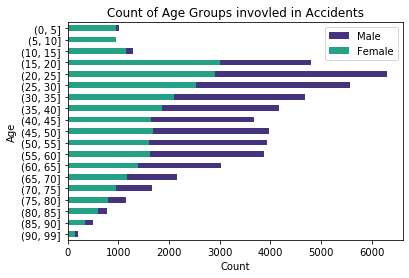

In [22]:
x_male = df[df.SEX == 1].age_bins.value_counts().sort_index(ascending=False)
x_female = df[df.SEX == 2].age_bins.value_counts().sort_index(ascending=False)
#color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots()
x_male.plot('barh', label = 'Male', color = COLOR_MAP[1])
x_female.plot('barh', label = 'Female', color = COLOR_MAP[5])
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Count of Age Groups invovled in Accidents')
plt.legend()
plt.savefig('Plots/age_groups.png')
plt.show()

In [23]:
df_per.DRINKING.unique()

array([0, 9, 8, 1])

In [24]:
def change(drinking):
    if drinking == 0:
        drinking = 'No'
    if drinking == 1:
        drinking = 'Yes'
    if drinking == 8:
        drinking = 'Not Reported'
    if drinking == 9:
        drinking = 'Unknown'
    return drinking

df_per.DRINKING = df_per.DRINKING.apply(change)

In [25]:
df_per.DRINKING.unique()

array(['No', 'Unknown', 'Not Reported', 'Yes'], dtype=object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/drinking.png'

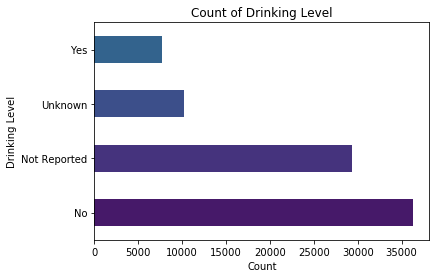

In [26]:
x = df_per.DRINKING.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots()
x.plot('barh', color = color1)
plt.xlabel('Count')
plt.ylabel('Drinking Level')
plt.title('Count of Drinking Level')
plt.savefig('Plots/drinking.png')
plt.show()

In [ ]:
x = df_acc.FATALS.value_counts().sort_index(ascending=False)
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots()
x.plot('barh', color=color1)
plt.xlabel('Count')
plt.ylabel('Fatalities')
plt.savefig('Plots/fatalities.png')
plt.show()

In [27]:
df_per.columns

Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'DRINKING', 'ALC_DET',
       'DRUGS', 'DRUG_DET'],
      dtype='object')

In [ ]:
#Vehicle dataset for future integration with Rating system
#pd.read_csv('veh.psv', sep = '|').columns